# Proyecto Machine Learning

1. Nombre: Rafael
1. Apellido: Contreras
1. Correo: rcontreraspimentel@gmail.com
1. Cédula: 30391915
--------
1. Nombre: Juan
1. Apellido: Fernández
1. Correo: juuanfz@gmail.com
1. Cédula: 28447019
--------

## Problema planteado

En el ámbito de la salud, el diagnóstico asistido por inteligencia artificial ha demostrado ser una herramienta invaluable. Modelos basados en redes neuronales convolucionales (CNN) pueden analizar imágenes médicas como radiografías o resonancias magnéticas para detectar enfermedades con alta precisión. Sin embargo, un problema crítico surge cuando los pacientes deben enviar sus imágenes médicas a servidores en la nube para ser procesadas por estos modelos.

El principal riesgo es la privacidad de los datos: las imágenes médicas contienen información altamente sensible que, en manos equivocadas, podría ser utilizada de manera indebida. Además, muchas regulaciones (como el GDPR en Europa o HIPAA en EE.UU.) exigen que los datos personales sean protegidos rigurosamente.

## Solución

Para este tipo de problemas una solución propuesta es usar modelos de machine learning con encriptado homomórfico. Adaptar un modelo de ML para usar estos esquemas de encriptado le daría la capacidad de hacer inferencias sobre input en un espacio encryptado. De esta manera solo el usuario podra tener acceso a sus datos.

El ciclo de desarrollo de estos modelos sigue un flujo similar al de un modelo de ML tradicional, pero con etapas adicionales para manejar el cifrado y la computación segura.


<img src="https://vlsiarch.eecs.harvard.edu/sites/hwpi.harvard.edu/files/styles/os_files_xxlarge/public/vlsiarch/files/privacy-preserving_machine_learning_resized.jpg?m=1603202778&itok=LymLGtv0" width="60%">

## Cifrado homomórfico

El cifrado homomórfico permite realizar operaciones en datos cifrados, de modo que los resultados, una vez descifrados, son equivalentes a los que se obtendrían al operar sobre los datos en claro. En el caso de las CNN, se requiere implementar operaciones sobre matrices y convoluciones en el dominio cifrado, lo cual es computacionalmente costoso pero posible con técnicas optimizadas.

El uso de cifrado homomórfico en CNN para diagnóstico médico puede ser usado para mantener la privacidad de los usuarios al enviar imágenes sensibles para los mismos.

#### Esquema de cifrado - Learning With Errors

SOURCES

- https://www.youtube.com/watch?v=K026C5YaB3A&t=312s&ab_channel=ChalkTalk

- https://docs.zama.ai/tfhe-rs/get-started/security_and_cryptography





En el resto del notebook puede que nos refiramos a este esquema como LWE.

El esquema Learning With Errors (LWE) es un problema criptográfico. Su seguridad se fundamenta en la dificultad de resolver sistemas de ecuaciones lineales cuando se introduce un pequeño *error aleatorio en los coeficientes*.

Se tiene que generar una clave clave publica formada por el par $(A,b)$ y una clave privada llamada $s$, la dificultad del problema viene dada al tratar de encontrar $s$ dado el par $(A,b)$. Todas las operaciones se realizan modulo $q$. Se tienen las siguientes definiciones:

Se genera de forma aleatoria la matriz $ A $. $\mathbb{Z}^n_q$ se refiere al conjunto de $n$ números $\{0,1,...,q-1\}$.

$ A_{ij} ∈ Z_q^n $

Se genera un vector *"ruido"* de forma aleatoria

$ e ∈ \{0, -1, 1\} $

$ b_i = A_i*s + e_i $

Aqui tenemos un ejemplo donde se le han asignado valores a estas variables

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*PnY6RmElCuXyPcQFv_2WBw.png" width="45%">

Un texto cifrado LWE es una colección de números enteros sin signo de 32 o 64 bits. Antes de cifrar un mensaje en un texto cifrado LWE, primero debe codificarlo como texto simple desplazando el mensaje a los bits más significativos del tipo de número entero sin signo utilizado.

Luego, se agrega un pequeño valor aleatorio llamado ruido a los bits menos significativos. Este ruido es crucial para garantizar la seguridad del texto cifrado. Todas estas operaciones ocurren *mod* $N$, siendo $N$ un número muy grande.


#### Codificado del mensaje

Tomaremos los "mensajes" como numeros que van de $[-c,c)$. El valor de m es uno de los parametros al momento de implementar LWE. Para esta seccion usaremos $c=4$ para facilitar la explicacion.

Entonces codificamos el mensaje de forma $m=i2^{29}$ donde $i ∈ [-4,4)$. Primero tenemos que $\mathbb{Z}_q = \{0,1,...q\}$ lo cual puede ser representado por enteros de 32 bits $[-2^{31}, 2^{31})$. Los valores de $m$ se muestran como puntos azules, entonces estamos mapeando los elementos del intervalo $[-c,c)$ al anillo que tenemos abajo.


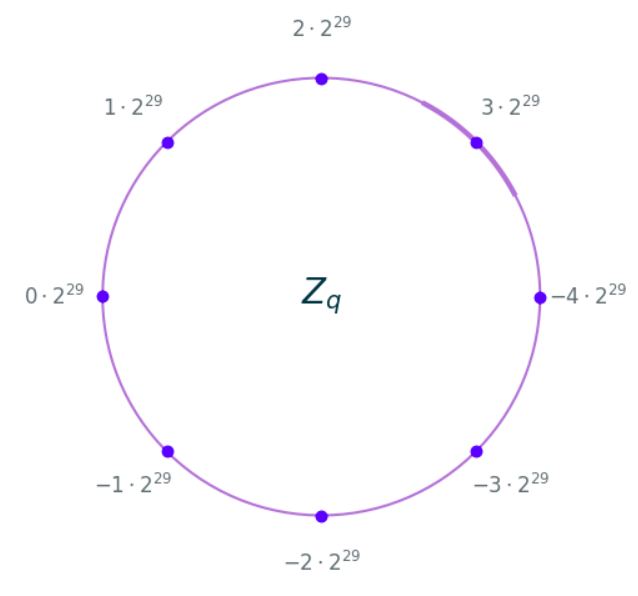

Ahora tendremos dos funciones de codificación y decodificación de mensajes:

$$
Encode(m): \mathbb{Z}_8 ->\mathbb{Z}_q
$$
$$
Encode(m) = m * 2^{29}
$$
$$
Decode(k): \mathbb{Z}_q ->\mathbb{Z}_8
$$
$$
Decode(k) = \lfloor k * 2^{-29} \rceil
$$

Decode moverá el mensaje recibido al punto azul más cercano.


#### Cifrado y descifrado

**Cifrado**

Tendremos un mensaje $m$ que será un vector de bits de tamaño $n$. La llave de encriptado es un vector binarios $s$ de tamaño aleatorio.

El encriptado de un número $ m ∈ \mathbb{Z}_q $ es hecho **escogiendo una fila random** $a$ de $A$ y un elemento de ruido $e_i ∈ \mathbb{Z}_q$. Luego definiendo la función de cifrado como:

$$
Enc(x) = (a,a*s+m+e) = (v,w)
$$

**Descifrado**

El descifrado de $(v,w)$ es 0 si $ w - v*s $ está más cerca de 0 que de $ 1/2 $ y es 1 en caso contrario.

$$
Dec(v,w) = w - v*s = a*s+m+e - a*s
$$

$$
Dec(v,w) = m + e
$$

Notamos que el resultado del descifrado es $m + e$. Este valor no es el mensaje buscado. Sin embargo, solo es necesario aplicar la función de decodificación que definimos antes.

$$
Decode(m + e) = m
$$

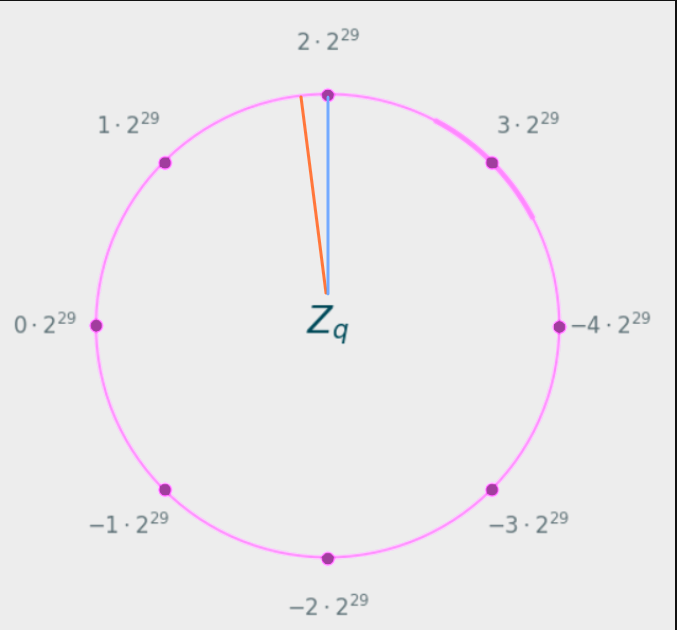

#### Operaciones en espacio encriptado (homomorfismo)

Las librerías que usaremos para lograr realizar operaciones con input encriptado usan una combinación de distintos cifrados (texto cifrado) de LWE, estos incluyen:

- $RLWE$: similar a LWE pero usando anillos de polinomios

- $GLWE$: una generalización para el cifrado $LWE$ y $RLWE$.

- $GGSW$: una generalización para cifrado $RGSW$.

- $GLev$: un tipo de texto cifrado intermedio durante operaciones.

El objetivo de este notebook no es ir en detalle sobre estos esquemas, asi que solo dejaremos referencias sobre los mismos:

- https://www.zama.ai/post/tfhe-deep-dive-part-1
- https://docs.zama.ai/tfhe-rs/get-started/security_and_cryptography
- https://www.daniellowengrub.com/blog/2024/01/03/fully-homomorphic-encryption

Ahora explicaremos una versión de encriptado homomoárfico más sencilla de entender y práctica para la intención de este notebook.

Demostraremos cómo el esquema de cifrado y descifrado nos permite tener las siguientes propiedades en la suma y multiplicación:

$
Encrypt(m_1) + Encrypt(m_2) = cyphertext_{sum}
$

$
Decrypt(cyphertext_{sum}) = m_1 + m_2
$

Tenemos que $c ∈ Z_q $

$
Encrypt(m_1) * c = cyphertext_{mul}
$

$
Decrypt(cyphertext_{mul} ) = m_1 * c
$


Ya con esto podremos tener una solución para el escenario donde un servidor que corre una función de regresion lineal de la forma:

$$
 f(x) = \sum_i^n{x_i * \alpha_i}
$$

Donde el servidor no es confiable y debemos enviar el input $x$ de forma cifrada.

Suma:

$$
Decrypt(cyphertext_{sum}) = Decrypt(a_1 + a_2, b_1 + b_2) = (b_1 + b_2) - (a_1 + a_2)*s = (b_1 - a_1*s) + (b_2 -a_2*s) = Decrypt(cypbertext_1) + Decrypt(cyphertext_2) = m_1 + m_2
$$


Multiplicación por un escalar:


$$
Decrypt(cyphertext_{mul}) = Decrypt(v*c, w*c) = w*c - v*c*s = Decrypt(cyphertext_{mul}) = c*(w-v*s) =  c*(m_1 + e) = c*m_1
$$


## Datos

Debido al tipo de problema que queremos resolver, se usara el siguiente dataset: [Skin disease dataset](https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset/code)

Este muestra imágenes de distintas enfermedades en la piel. Asimismo, identifica qué enfermedad se le asigna a cada imagen. Se escogió este dataset ya que encaja perfecto con el caso de darle privacidad a los usuarios con respecto a su informacion personal en el ámbito de la salud.

In [ ]:
!pip install kaggle
!pip install pillow

A continuación los comandos de instalación para las librerías a usar. Estas nos permitirán compilar modelos de ML para que sean capaces de usar FHE. Para la primera instalación es necesario los siguientes requerimientos en el ambiente local:

- Python 2.8, 2.9, 2.10 o 2.11
- gclib 2.28 en adelante
- Linux x86_64

Debería ser capaz de usar el GPU luego de esta instalación. Caso contrario se usará CPU, estas herramientas todavía están en desarrollo.

In [ ]:
!pip install --extra-index-url https://pypi.zama.ai/gpu concrete-python
!pip install concrete-ml

In [ ]:
import kagglehub
import os

SEED = 30391915 + 28447019

# Download latest version
path = kagglehub.dataset_download("subirbiswas19/skin-disease-dataset")

#### Preprocesamiento:

In [ ]:
from PIL import Image
import numpy as np
import os

train_path, test_path = path + '/skin-disease-datasaet/train_set', path + '/skin-disease-datasaet/test_set'
img_size = (30,30)

def load_data(path):
    img_paths = os.listdir(path)
    class_cnt = 0
    X = []  # Definimos X para almacenar las imágenes
    Y = []  # Definimos Y para almacenar las etiquetas

    for img_class in img_paths:
        cur_path = path + '/' + img_class
        image_paths = os.listdir(cur_path)
        for img_path in image_paths:
            image = Image.open(f'{cur_path}/{img_path}').resize(img_size)
            # Convertir imagen a formato (canales, alto, ancho)
            X.append(np.transpose(np.array(image), (2, 0, 1)))  # Usamos X aquí
            Y.append(class_cnt)
        class_cnt += 1

    # Prealocar memoria para las listas X y Y
    X_res = np.empty((len(X), X[0].shape[0], X[0].shape[1], X[0].shape[2]), dtype=np.uint8)
    Y_res = np.empty(len(Y), dtype=np.uint8)

    for i in range(len(X)):
        X_res[i] = X[i]
        Y_res[i] = Y[i]

    return X_res, Y_res

# Llamar a la función para cargar los datos
x_train, y_train = load_data(train_path)
x_test, y_test = load_data(test_path)

# Normalizamos las imágenes
x_train = x_train / 255
x_test = x_test / 255

# Mostrar dimensiones de la primera imagen de prueba y la 120
print("Dimensiones de las imágenes de prueba:")
print(x_test[0].shape, x_test[120].shape)

Dimensiones de las imágenes de prueba:
(3, 30, 30) (3, 30, 30)


Vemos que redimensionamos a un tamaño a 30x30 px esto por velocidad del modelo ya que al aumentar más sus tamaños de requiere más poder de cómputo del cual estamos limitados (Lo máximo que podemos aumentarle para efectos prácticos es una redimensión de 40x40).

También las imágenes las normalizamos y las organizamos en arrays de numpy, esto para adecuarlas para alimentar al modelo más adelante. Además, mostramos  las dimensiones de las imágenes para asegurarnos de que el preprocesamiento se ha realizado correctamente.

#### Data Visualization

['PA-cutaneous-larva-migrans', 'VI-shingles', 'FU-ringworm', 'FU-athlete-foot', 'BA- cellulitis', 'FU-nail-fungus', 'BA-impetigo', 'VI-chickenpox']


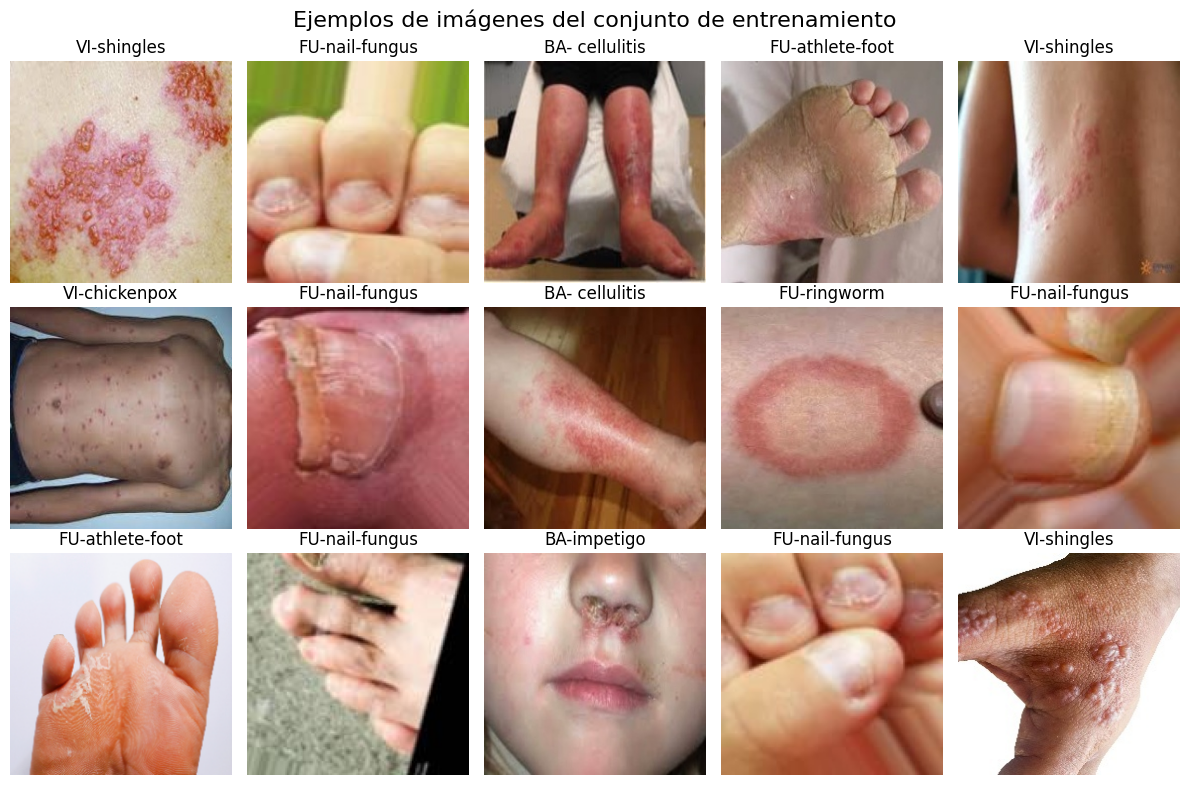

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Obtener las clases
classes = os.listdir(train_path)
n_classes = len(classes)

# Mostrar algunas imágenes de entrenamiento con sus etiquetas
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.suptitle("Ejemplos de imágenes del conjunto de entrenamiento", fontsize=16)

for ax in axes.ravel():
    class_name = random.choice(classes)
    class_path = os.path.join(train_path, class_name)
    img_name = random.choice(os.listdir(class_path))
    img = Image.open(os.path.join(class_path, img_name))

    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis("off")

print(classes)
plt.tight_layout()
plt.show()


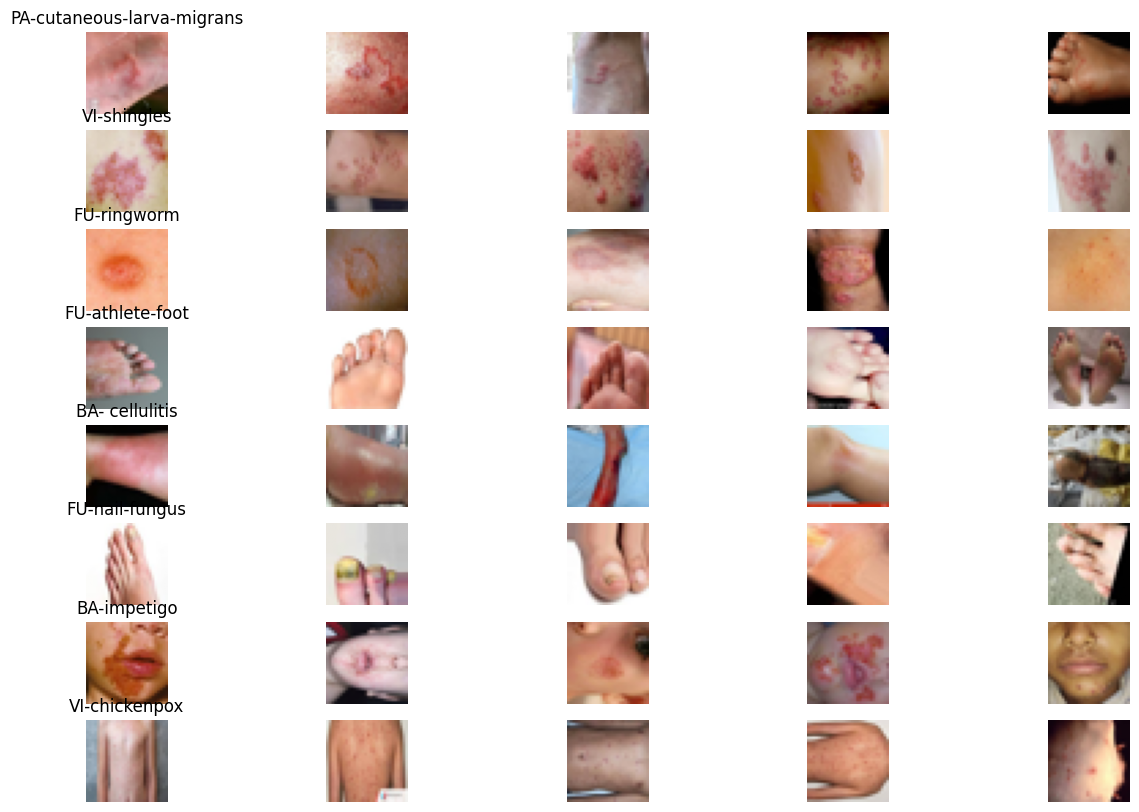

In [ ]:
def plot_class_samples(X, Y, class_names, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(len(class_names)):
        class_samples = np.where(Y == i)[0][:num_samples]  # Tomar las primeras 'num_samples' imágenes de cada clase
        for j, sample_idx in enumerate(class_samples):
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(np.transpose(X[sample_idx], (1, 2, 0)))  # Convertir de (canales, alto, ancho) a (alto, ancho, canales)
            plt.axis('off')
            if j == 0:
                plt.title(class_names[i])
    plt.show()

# Llamar la función pasando las clases
class_names = os.listdir(train_path)
plot_class_samples(x_train, y_train, class_names)


Seguidamente vemos imágenes aleatorias del conjunto de entrenamiento que manejaremos junto a sus etiquetas (clase a la que pertenecen) tanto originales como redimensionadas, esto recorriendo las carpetas del dataset para obtenerlas. Esta visualización es útil para inspeccionar cómo las imágenes se ven en cada clase y verificar que el conjunto está bien estructurado y cargado.


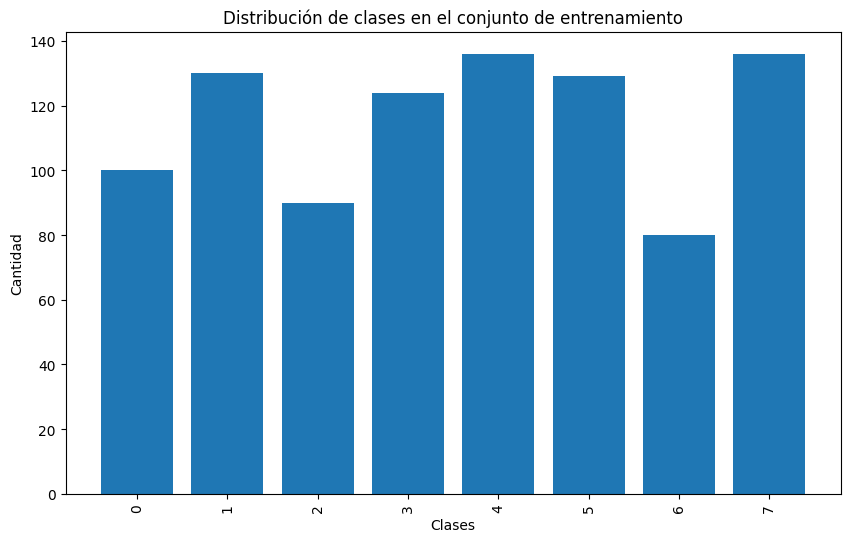

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Visualizar distribución de clases
class_counts = Counter(y_train)  # y_train tiene las etiquetas de clase
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()


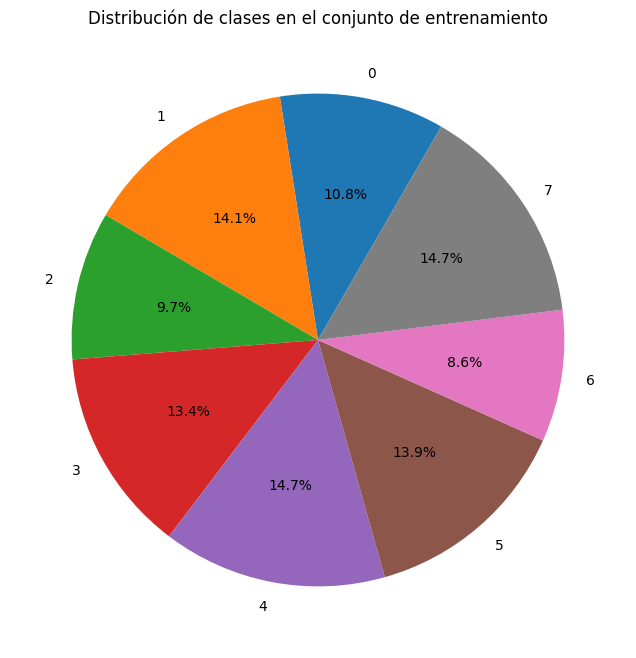

In [ ]:
class_counts = Counter(y_train)
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=60)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.show()

En este histograma y gráfico de torta nos muestra también cómo se distribuyen las clases, nos ayudan a identificar la cantidad de imágenes que hay por clases y el porcentaje, esto nos ayuda a observar desbalance, en este caso no es tan significativo (en la clase 1 tenemos menos cantidad que el resto)

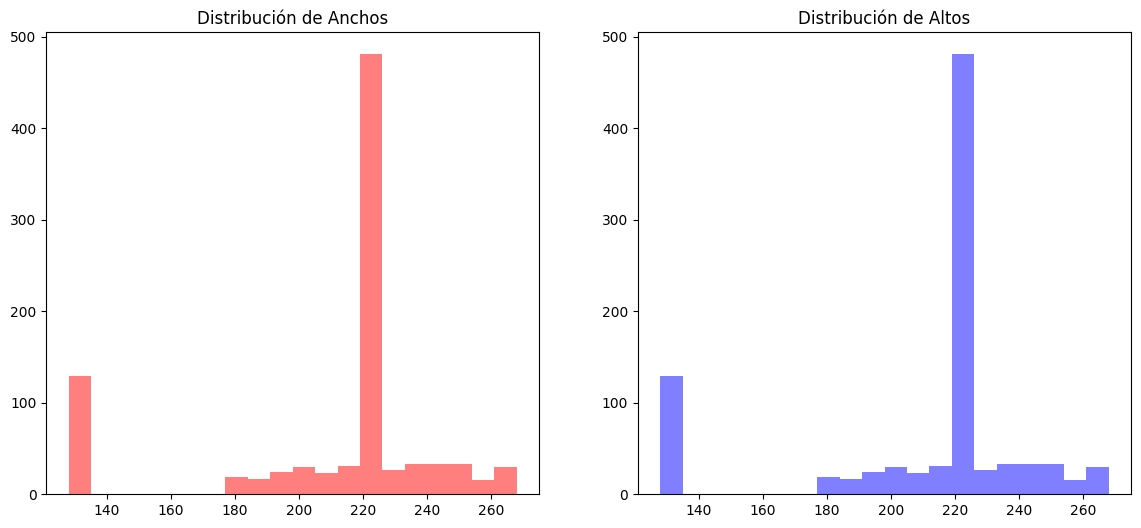

In [ ]:
# Obtener el tamaño de cada imagen
sizes = [Image.open(f'{train_path}/{class_name}/{img_name}').size for class_name in os.listdir(train_path) for img_name in os.listdir(f'{train_path}/{class_name}')]

# Extraer el ancho y alto de las tuplas (ancho, alto)
widths, heights = zip(*sizes)

# Graficar distribución de los anchos y altos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].hist(widths, bins=20, alpha=0.5, label='Ancho', color='red')
ax[1].hist(heights, bins=20, alpha=0.5, label='Alto', color='blue')
ax[0].set_title('Distribución de Anchos')
ax[1].set_title('Distribución de Altos')
plt.show()


Acá vemos cómo están distribuidos los anchos y altos de las imágenes del conjuto de datos de entrenamiento

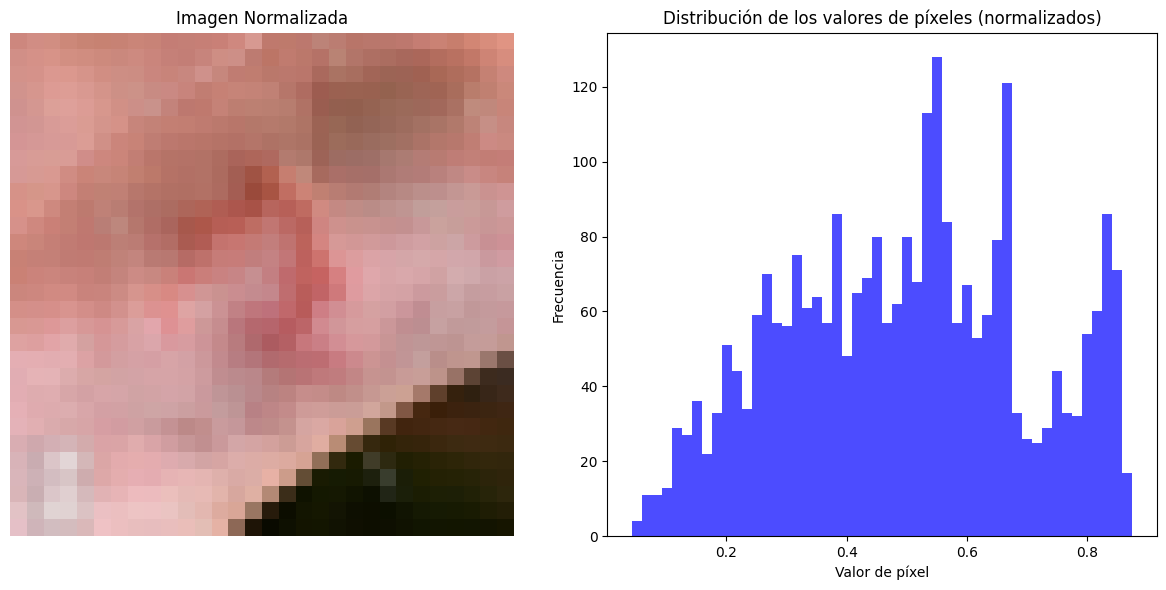

In [ ]:
# Graficar los valores de píxeles de una imagen normalizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.transpose(x_train[0], (1, 2, 0)))  # Muestra la segunda imagen
plt.title("Imagen Normalizada")
plt.axis('off')

# Graficar la distribución de los valores de los píxeles
plt.subplot(1, 2, 2)
plt.hist(x_train[10].flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribución de los valores de píxeles (normalizados)")
plt.xlabel("Valor de píxel")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


Observamos la distribución de los píxeles de la primera imagen ya normalizada junto a la imagen en sí, si nos fijamos en este imagen  vemos que hay una concentración en el rango bajo de los valores de los píxeles lo que nos sugiere efectivamente que esta imagen tiene áreas con intensidad oscura y un pico hacia el rango más alto que nos indica contraste y brillo en partes especificas como podemos ver

## Modelado y parámetros

Siendo un modelo de clasificacion de imágenes, la solución propuesta es usar una red convolucional. Ahora hay varias cosas que tomamos en cuenta para este problema:

- Tiempo de entrenamiento
- Uso de RAM durante el compilado para el esquema de encriptado
- Tiempo de inferencia normal y con datos encriptados

El modelo de $CNN$ final es el resultado de varias iteraciones, la primera propuesta fue una red mucho más compleja con varias capas de convolución y una capa de clasificación de un tamaño considerable (abajo agregaremos una de las versiones anteriores).

El problema principal era el uso de RAM, que sobrepasaba los 15GB (e incluso más en las primeras versiones que eran mucho mas grandes que la mostrada aqui). La RAM se disparaba cuando se hacia el compilado para convertir el modelo a un circuito aritmético (más sobre esto después).


In [ ]:
import time

import numpy as np
import torch
import torch.utils
from concrete.compiler import check_gpu_available
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

from concrete.ml.torch.compile import compile_torch_model

import matplotlib.pyplot as plt

print("gpu available", check_gpu_available())

gpu available False


#### Una de las iteraciones del modelo original

In [ ]:

class CNNnet(torch.nn.Module):
    def __init__(self):
        super(CNNnet,self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(3,8,3,2,1),
            torch.nn.BatchNorm2d(8),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2,2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(8,16,3,2,1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(8,8),
            torch.nn.Dropout(0.2)
        )

        self.gap = torch.nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling
        self.mlp1 = torch.nn.Linear(16,8)

    # feedforward
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.gap(x)

        x = self.mlp1(x.view(x.size(0),-1))
        x = self.mlp2(x)
        return x

#### Modelo final

Otro problema que presentamos es la incapacidad de la librería de convertir ciertas funciones a un circuito aritmético. Esto es debido a que no tienen soporte para varias operaciones, este problema lo presentamos con* "AdaptiveAvgPool2d"*.

Otro problema presentado era el dataset. Debido a que existían 3 canales y las imágenes tenían un tamaño máximo de 224 x 224, esto incrementaba **mucho** el tamaño final del modelo. A su vez incrementa el tamaño del modelo compilado y el uso de ram. La decisión que tomamos para esto fue reducir las dimensiones de las imágenes hasta el punto que podamos aprender lo suficiente como para mantener el accuracy de mas de 0.7 (comentada esta nueva resolución en la parte de preprocesamiento).

Finalmente, luego de eliminar complejidad en la estructura de la red y reducir las dimensiones de las imágenes (reduciendo aún más el tamaño de la red), obtuvimos el siguiente modelo.

In [ ]:
class CNNnet(nn.Module):
    def __init__(self, n_classes) -> None:
        super().__init__()

        self.conv1 = nn.Conv2d(3, 8, 3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=0)
        self.conv3 = nn.Conv2d(16, 32, 2, stride=1, padding=0)
        self.fc1 = nn.Linear(32*12*12, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        return x

Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:29<00:00,  5.17it/s]


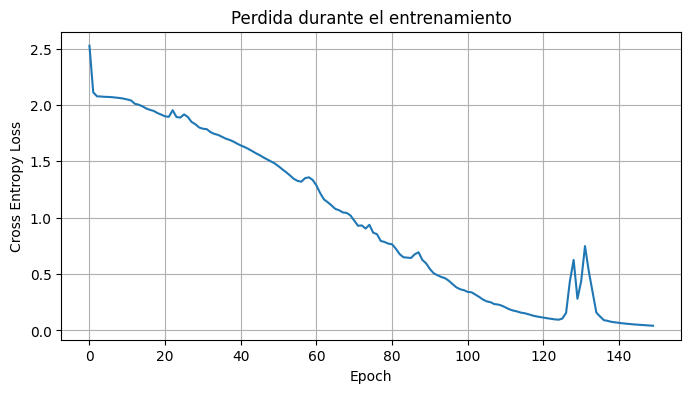

In [ ]:
torch.manual_seed(42)

def train_one_epoch(net, optimizer, train_loader):
    loss = nn.CrossEntropyLoss()

    net.train()
    avg_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = net(data)
        loss_net = loss(output, target.long())
        loss_net.backward()
        optimizer.step()
        avg_loss += loss_net.item()

    return avg_loss / len(train_loader)

N_EPOCHS = 150

train_dataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_dataloader = DataLoader(train_dataset, batch_size=64)

test_dataset = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))
test_dataloader = DataLoader(test_dataset)

net = CNNnet(8)
losses_bits = []
optimizer = torch.optim.Adam(net.parameters())
for _ in tqdm(range(N_EPOCHS), desc="Training"):
    losses_bits.append(train_one_epoch(net, optimizer, train_dataloader))

fig = plt.figure(figsize=(8, 4))
plt.plot(losses_bits)
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.title("Perdida durante el entrenamiento")
plt.grid(True)
plt.show()

## Compilado y transformación del modelo

### Compilado

La compilación de un modelo es necesaria para la evaluación de datos encriptados con el mismo. El proceso es bastante complejo, sin embargo, contiene una serie de pasos fundamentales:

- Define la función: En este caso la funcion en python es la $CNN$.

- Compilar la función: Se compila la función transformándola en un circuito aritmético. Esto es una representación de la función usando compuertas aritméticas o booleanas.

- Determinar los hiperparámetros para el proceso de encriptado: El compilado a su vez determina los mejores parámetros de configuración para el circuito, un ejemplo, es la cantidad de bits para representar los pesos en capas intermedias del circuito.

Como la ejecución de FHE es **mucho** más lenta que la ejecución de datos no cifrados, *Concrete ML* tiene un modo de simulación que puede ayudar a evaluar rápidamente el impacto de la ejecución de FHE en los modelos. Usaremos este modo de "simulación" para la sección de comparación de modelos.

### Cuantificacion lineal por rangos

[Referencia #1](https://docs.zama.ai/concrete-ml/explanations/quantization)

[Referencia #2](https://intellabs.github.io/distiller/algo_quantization.html)

La cuantificación es el proceso de restringir una entrada de un conjunto continuo o grande de valores (como números reales) a un conjunto discreto (como números enteros). Esto reduce significativamente la cantidad de bits necesarios para los resultados intermedios durante la ejecución de estos modelos de aprendizaje automático. Esto provoca perdida de precision.

Dado que actualmente el esquema de FHE está limitada a números enteros de *16 bits*, es necesario cuantificar los modelos para que sean compatibles.


**Fundamentos**

Dejar $[\alpha,\beta]$ sea el rango de un valor a cuantificar donde $\alpha$ es el mínimo y $\beta$ es el máximo. Para cuantificar un rango de valores de punto flotante (en $\mathbb{R}$) a valores enteros en $\mathbb{Z}$, el primer paso es elegir el tipo de datos que se va a utilizar. Muchos modelos de ML trabajan con pesos y activaciones representados como números enteros de 8 bits, por lo que este será el valor utilizado en este ejemplo.

Con esto podemos calcular $S$ que es la distancia entre dos valores enteros consecutivos luego de cuantificar:

$$
S = \frac{\beta - \alpha}{2^{norte} - 1}
$$

Donde $2^{norte}-1$ es el número de valores enteros posibles con la cantidad de bits seleccionada. Básicamente $S$ representa el cambio de valor en cada paso del rango cuantificado.

Para cuantificar un valor de punto flotante $x$ en el rango $[\alpha,\beta]$ se utiliza la siguiente fórmula:

$$
x_{quant} = round(\frac{x-\alpha}{S}) + Z_p
$$

Donde $Z_p$ es el valor entero que representa el 0 en el rango original:

$$
Z_p = round(-\frac{\alpha}{S})
$$

En la imagen de abajo observamos como se mapean valores de un conjunto grande de números a un conjunto menor.

<img src="https://intellabs.github.io/distiller/imgs/quant_sym.png" width="45%"/> <img src="https://intellabs.github.io/distiller/imgs/quant_asym.png" width="45%"/>

In [ ]:
n_bits = 6

device = "cuda" if check_gpu_available() else "cpu"

fhe_model = compile_torch_model(net, x_train.astype(float), rounding_threshold_bits=n_bits, p_error=0.1, device=device)

### Uso en produccion

En producción se tendrán clientes y un servidor que se encargue de procesar los datos de usuario. Las librerías que usamos ya nos permiten crear dos objetos que se pueden exportar al cliente y servidor.

Para el cliente se puede generar una $llave$ $privada$ que se usará para encriptar la data de su lado. Luego, esto se usará como input para ser procesado por el servidor, se retornará el resultado encriptado para poder ser revelado en el lado del cliente.



<img src="https://docs.zama.ai/~gitbook/image?url=https%3A%2F%2F982026572-files.gitbook.io%2F%7E%2Ffiles%2Fv0%2Fb%2Fgitbook-x-prod.appspot.com%2Fo%2Fspaces%252FVo0VAsu7f5LmyTWU78D1%252Fuploads%252Fgit-blob-f0c968fefec32658440dbc5814e2082b579c6200%252Fconcretemlgraph3.jpg%3Falt%3Dmedia&width=400&dpr=3&quality=100&sign=40aad011&sv=2" width="60%">

In [ ]:
# necesario para evitar que falle el codigo abajo
!mkdir tmp
!mkdir tmp/fhe_models
!mkdir tmp/models
!rm -r ./tmp/fhe_models/*

mkdir: cannot create directory ‘tmp’: File exists
mkdir: cannot create directory ‘tmp/fhe_models’: File exists
mkdir: cannot create directory ‘tmp/models’: File exists


In [ ]:
from concrete.ml.deployment import FHEModelDev, FHEModelClient, FHEModelServer
import numpy as np
import torch

# Directorio para guardar los modelos
fhe_directory = './tmp/fhe_models/'
torch.save(net.state_dict(), './tmp/models/cnn.pt')

dev = FHEModelDev(path_dir=fhe_directory, model=fhe_model)
dev.save()

client = FHEModelClient(path_dir=fhe_directory, key_dir="/tmp/keys_client")
serialized_evaluation_keys = client.get_serialized_evaluation_keys()

img,target = next(iter(test_dataloader))
encrypted_img = client.quantize_encrypt_serialize(img.numpy())

server = FHEModelServer(path_dir=fhe_directory)
server.load()


# Evaluación y comparación

Como se había expresado antes. Las librerías para este modelo tienen un feature que nos permite hacer inferencia con encriptado "simulado". Es decir, que se realiza la inferencia sin encriptar los datos, pero con una pérdida cercana a la real por el cuantificado de datos, se simula la pérdida de precisión por usar el circuito aritmético, etc.

Se usa este método para evaluar el performance debido a que la inferencia real con data encriptada tarda **demasiado**. Luego se hará una demostración de esto

In [ ]:
# funcion para evaluar el modelo usando FHE de forma simulada
def test_with_concrete(quantized_module, test_loader):
    all_y_pred = np.zeros((len(test_loader)), dtype=np.int64)
    all_targets = np.zeros((len(test_loader)), dtype=np.int64)

    idx = 0
    for data, target in tqdm(test_loader):
        data = data.numpy()
        target = target.numpy()

        y_pred = quantized_module.forward(data, fhe="simulate")
        endidx = idx + target.shape[0]

        all_targets[idx:endidx] = target

        y_pred = np.argmax(y_pred, axis=1)
        all_y_pred[idx:endidx] = y_pred

        idx += target.shape[0]

    return all_targets, all_y_pred

y_target,y_pred = test_with_concrete(fhe_model, test_dataloader)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [01:46<00:00,  2.20it/s]


In [ ]:
def test_torch(net, test_loader):
    net.eval()

    all_y_pred = np.zeros((len(test_loader)), dtype=np.int64)
    all_targets = np.zeros((len(test_loader)), dtype=np.int64)

    idx = 0
    for data, target in test_loader:
        endidx = idx + target.shape[0]
        all_targets[idx:endidx] = target.numpy()

        output = net(data).argmax(1).detach().numpy()
        all_y_pred[idx:endidx] = output

        idx += target.shape[0]

    return all_targets, all_y_pred


all_targets, all_y_pred = test_torch(net, test_dataloader)

Procederemos a comparar las métricas de $Accuracy$, $Precision$, $Recall$ y $F1-Score$ tanto del Modelo Original como el Modelo con FHE

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def plot_comparison_metrics(y_true1, y_pred1, y_true2, y_pred2, labels):
    """Grafica las métricas de ambos modelos en barras comparativas con valores encima."""
    metrics1 = {
        "Accuracy": accuracy_score(y_true1, y_pred1),
        "Precision": precision_score(y_true1, y_pred1, average="macro"),
        "Recall": recall_score(y_true1, y_pred1, average="macro"),
        "F1-Score": f1_score(y_true1, y_pred1, average="macro"),
    }

    metrics2 = {
        "Accuracy": accuracy_score(y_true2, y_pred2),
        "Precision": precision_score(y_true2, y_pred2, average="macro"),
        "Recall": recall_score(y_true2, y_pred2, average="macro"),
        "F1-Score": f1_score(y_true2, y_pred2, average="macro"),
    }

    x = range(len(metrics1))
    width = 0.25  # Ancho de las barras

    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las barras para el modelo normal
    bars1 = ax.bar(x, metrics1.values(), width, label=labels[0], color="blue")

    # Graficar las barras para el modelo con FHE desplazadas
    bars2 = ax.bar([p + width for p in x], metrics2.values(), width, label=labels[1], color="orange")

    # Añadir valores encima de las barras para el modelo normal
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom")

    # Añadir valores encima de las barras para el modelo con FHE
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom")

    ax.set_ylabel("Valor")
    ax.set_title("Comparación de Métricas de los Modelos")
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(metrics1.keys())
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.tight_layout()
    plt.show()


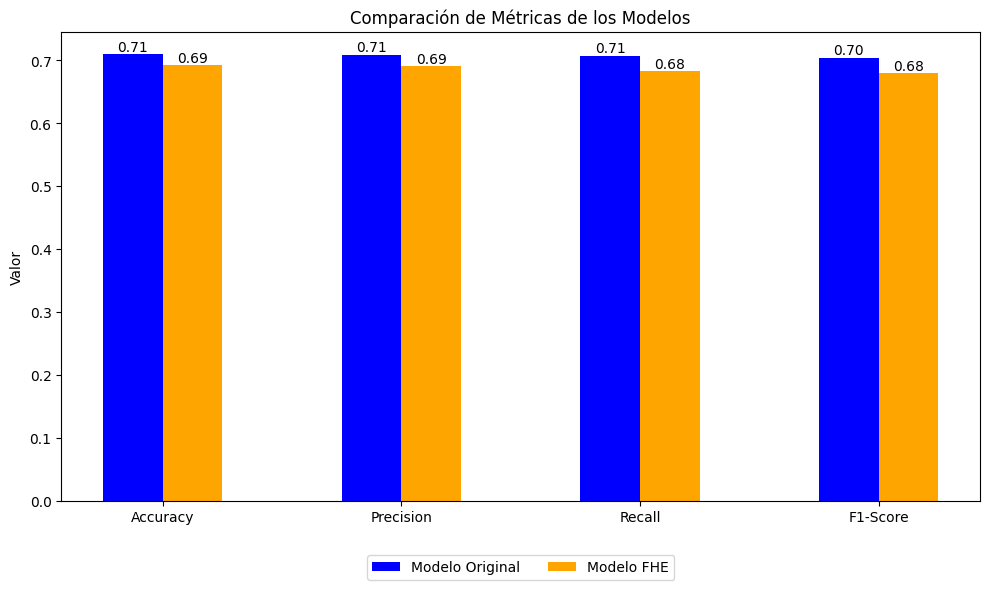

In [ ]:
plot_comparison_metrics(all_targets, all_y_pred, y_target, y_pred, labels=["Modelo Original", "Modelo FHE"])

Observamos que el Modelo Original muestra un mejor desempeño en general que el Modelo FHE. Esto debido a la precision perdida al trabajar con pesos e input cuantificado.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true1, y_pred1, y_true2, y_pred2, labels):
    """Grafica las matrices de confusión comparativas de los dos modelos."""
    cm1 = confusion_matrix(y_true1, y_pred1)
    cm2 = confusion_matrix(y_true2, y_pred2)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Graficar la matriz de confusión para el modelo normal
    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_title("Matriz de Confusión - Modelo Original")
    axes[0].set_xlabel("Predicción")
    axes[0].set_ylabel("Real")

    # Graficar la matriz de confusión para el modelo con FHE
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Oranges", xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_title("Matriz de Confusión - Modelo FHE")
    axes[1].set_xlabel("Predicción")
    axes[1].set_ylabel("Real")

    plt.show()

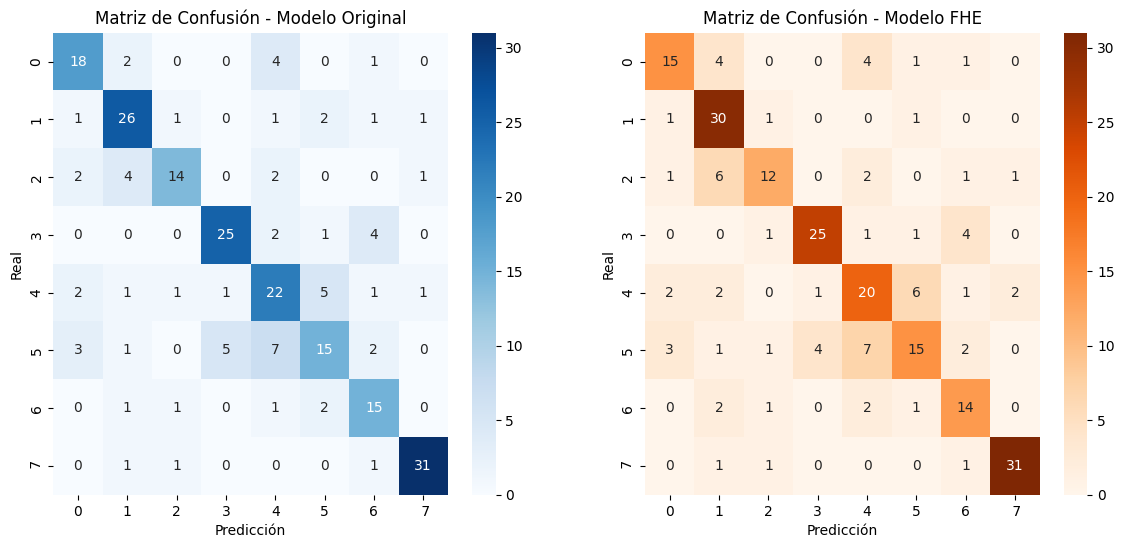

In [ ]:
# Llamada para las matrices de confusión
plot_confusion_matrix(all_targets, all_y_pred, y_target, y_pred, labels=["0", "1", "2", "3", "4", "5", "6", " 7"])

Vemos las matrices de confusión respectivas para cada modelo, y efectivamente vemos que el Modelo Original predice correctamente una mayor cantidad de veces las clases que el modelo con FHE.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def get_predictions_and_probs(net, test_loader):
    """Obtiene los valores reales y las probabilidades de predicción del modelo."""
    net.eval()
    all_targets = []
    all_probs = []

    with torch.no_grad():
        for data, target in test_loader:
            output = torch.softmax(net(data), dim=1)  # Obtener probabilidades
            all_probs.append(output.numpy())
            all_targets.append(target.numpy())

    all_probs = np.vstack(all_probs)  # Unir todas las probabilidades
    all_targets = np.concatenate(all_targets)  # Unir todas las etiquetas reales

    return all_targets, all_probs

def get_predictions_and_probs_quantized(quantized_module, test_loader):
    """Obtiene los valores reales y las probabilidades de predicción del modelo cuantizado simulado."""
    #quantized_module.eval()
    all_targets = []
    all_probs = []

    with torch.no_grad():
        for data, target in test_loader:
            # Convertir datos a numpy y realizar la inferencia cuantizada
            data = data.numpy()
            y_pred = quantized_module.forward(data, fhe="simulate")  # Inferencia del modelo cuantizado

            # Obtener probabilidades (aplicar softmax si es necesario)
            y_pred_prob = torch.softmax(torch.tensor(y_pred), dim=1).detach().numpy()

            all_probs.append(y_pred_prob)
            all_targets.append(target.numpy())

    all_probs = np.vstack(all_probs)  # Unir todas las probabilidades
    all_targets = np.concatenate(all_targets)  # Unir todas las etiquetas reales

    return all_targets, all_probs

def plot_roc_curve(y_true, y_pred_prob, classes):
    """Dibuja la curva ROC para múltiples clases."""
    y_true_bin = label_binarize(y_true, classes=range(len(classes)))
    plt.figure(figsize=(8, 6))

    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Clase {classes[i]} (AUC = {auc_score:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Adivinar (AUC = 0.50)")
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title("Curva ROC ")
    plt.legend()
    plt.show()

**get_predictions_and_probs** y **get_predictions_and_probs_quantized** obtienen las etiquetas reales como las probabilidades de predicción de cada modelo (Original y FHE respectivamente), por otra parte la función **plot_roc_curve** dibujará las curvas de cada modelo por múltiples clases como es el caso de nuestros modelos, esto para ver cómo los modelos discriman las tasas de VP y FP

### Curvas ROC Modelo Normal

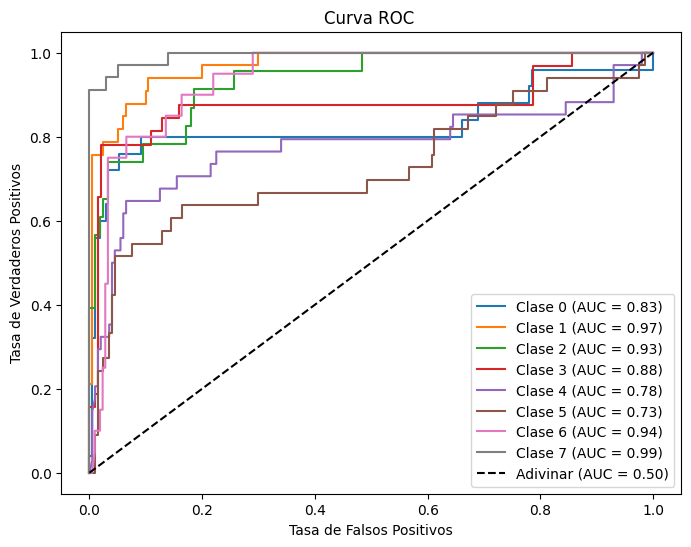

In [ ]:
# Obtener predicciones y probabilidades correctamente
all_targets, y_pred_prob = get_predictions_and_probs(net, test_dataloader)

# Definir nombres de clases
classes = [str(i) for i in range(y_pred_prob.shape[1])]

# Graficar la Curva ROC
plot_roc_curve(all_targets, y_pred_prob, classes)

### Curvas ROC Modelo con FHE

In [ ]:
def get_predictions_and_probs_quantized(quantized_module, test_loader):
    """Obtiene los valores reales y las probabilidades de predicción del modelo cuantizado simulado."""
    #quantized_module.eval()
    all_targets = []
    all_probs = []

    with torch.no_grad():
        for data, target in test_loader:
            # Convertir datos a numpy y realizar la inferencia cuantizada
            data = data.numpy()
            y_pred = quantized_module.forward(data, fhe="simulate")  # Inferencia del modelo cuantizado

            # Obtener probabilidades (aplicar softmax si es necesario)
            y_pred_prob = torch.softmax(torch.tensor(y_pred), dim=1).detach().numpy()

            all_probs.append(y_pred_prob)
            all_targets.append(target.numpy())

    all_probs = np.vstack(all_probs)  # Unir todas las probabilidades
    all_targets = np.concatenate(all_targets)  # Unir todas las etiquetas reales

    return all_targets, all_probs


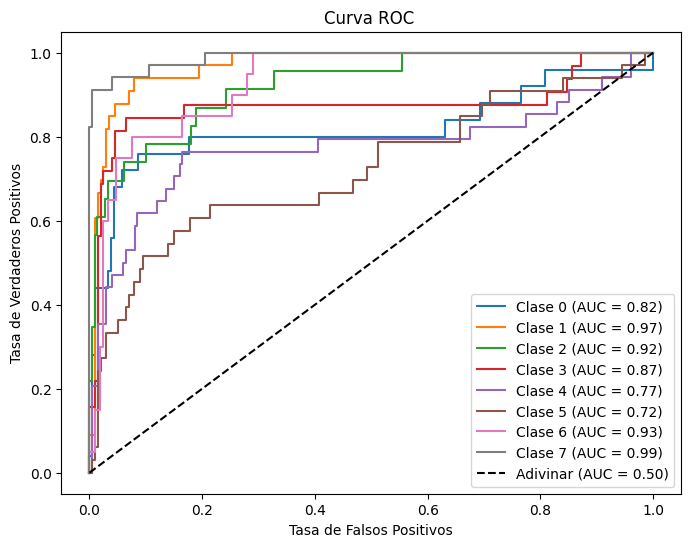

In [ ]:
y_target, y_pred = get_predictions_and_probs_quantized(fhe_model, test_dataloader)

# Definir los nombres de las clases (ajusta según tu dataset)
classes = [str(i) for i in range(y_pred.shape[1])]

# Graficar la Curva ROC
plot_roc_curve(y_target, y_pred, classes)


Viendo ambas curvas ROC poseen una discriminación similar y muy buena, aunque ligeramente mejor para las clases: 2, 3, 4, 5 y 7 en el Modelo Original

## Confianza en predicciones:

Esta gráfica nos ayuda a ver qué tan *"seguro"* es el modelo prediciendo

In [ ]:
def plot_prediction_distribution(y_pred_prob):
    """Muestra la distribución de las probabilidades de predicción."""
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_prob.max(axis=1), bins=20, color='purple', alpha=0.7)
    plt.xlabel("Confianza en la Predicción")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de Confianza de las Predicciones")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()



###  Modelo Normal

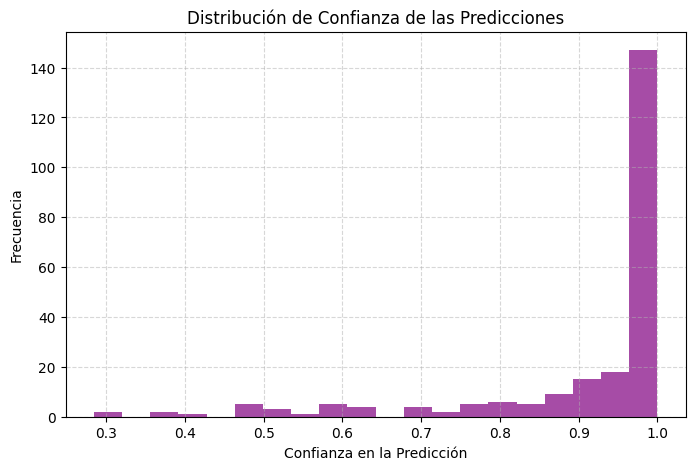

In [ ]:
plot_prediction_distribution(y_pred_prob)

### Modelo con FHE

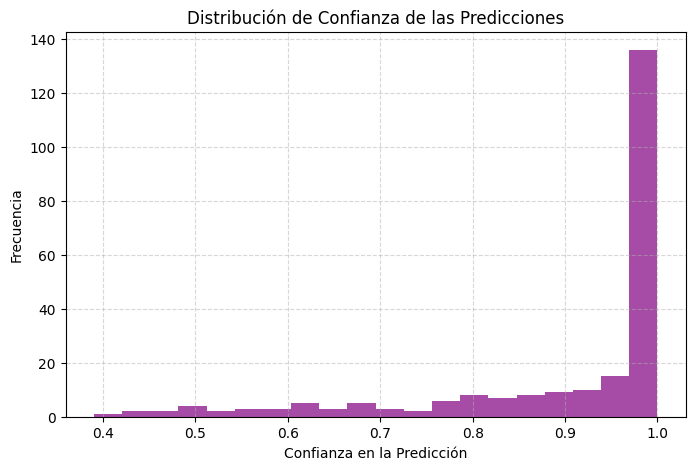

In [ ]:
plot_prediction_distribution(y_pred)

Vemos que en general el Modelo original tiene *más confianza* en las predicciones correctas pues la frecuencia es mayor al modelo con FHE, aunque FHE tiene *"menor confianza"* esto no nos dice que es inferior, nos puede indicar que el modelo es más neutral con sus predicciones y las distribuye de manera ligeramente más uniforme que el Original

### Modelo con FHE

Dado que el modelo que usa FHE tarda mucho más en hacer las inferencias. Consideramos que es una métrica importante a comparar con un modelo original.

In [ ]:
# Separamos esta sección dado que la inferencia usando el circuito aritmético toma tiempo
# Server processes the encrypted data

t = time.time()
encrypted_res = server.run(encrypted_img, serialized_evaluation_keys)
fhe_inference_time = time.time() - t

# Client decrypts the result
result = client.deserialize_decrypt_dequantize(encrypted_res)
print(f"inference result: {result}. expected result: {target}")
print(f"inference time: {fhe_inference_time}")